In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Configuration for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported.")

# Check for zip file and extract
files_in_directory = os.listdir()
zip_files = [f for f in files_in_directory if f.endswith('.zip')]

if len(zip_files) > 0:
    zip_name = zip_files[0]
    print(f"Extracting {zip_name}...")
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall()
    print("Extraction complete.")
else:
    print("No .zip file found. Proceeding with existing CSVs.")

# Load the dataset
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

if len(csv_files) > 0:
    data_filename = csv_files[0]
    print(f"Loading data from: {data_filename}")
    df = pd.read_csv(data_filename)
    df.columns = df.columns.str.strip() # Remove whitespaces from column names
    print("Dataset loaded successfully.")
    display(df.head())
else:
    print("Error: No .csv file found in the directory.")

Libraries imported.
Extracting archive.zip...
Extraction complete.
Loading data from: data.csv
Dataset loaded successfully.


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Class Distribution:
Healthy (0): 6599
Bankrupt (1): 220
Bankruptcy Rate: 3.23%
------------------------------


/tmp/ipython-input-24943436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, ax=ax[0], palette="viridis")


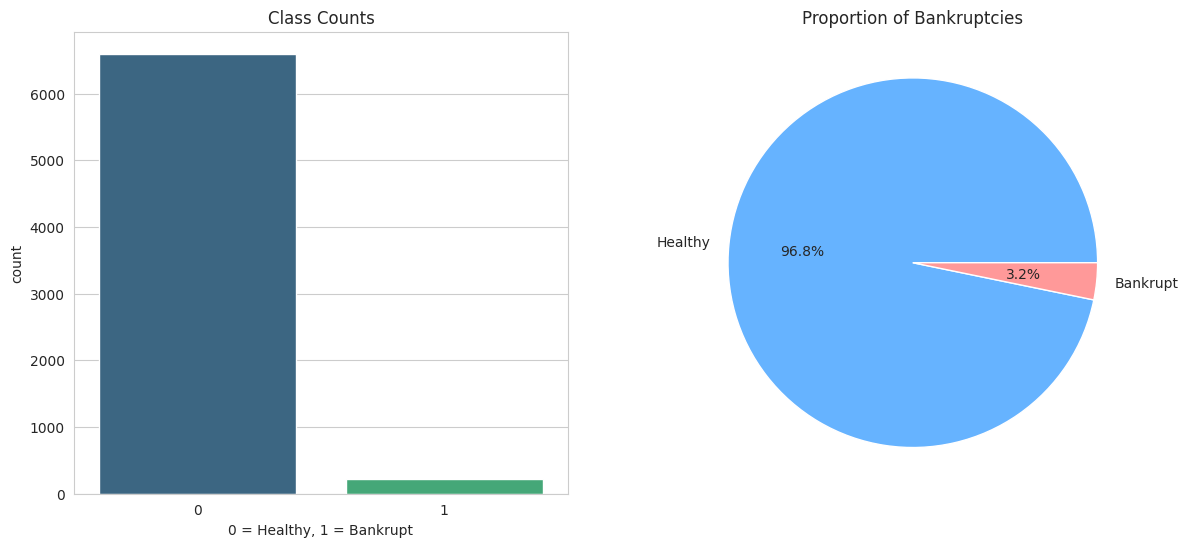

In [2]:
# Target variable analysis
target_col = 'Bankrupt?'

# Check class distribution
counts = df[target_col].value_counts()
print("Class Distribution:")
print(f"Healthy (0): {counts[0]}")
print(f"Bankrupt (1): {counts[1]}")

# Calculate percentage
perc_bankrupt = (counts[1] / len(df)) * 100
print(f"Bankruptcy Rate: {perc_bankrupt:.2f}%")
print("-" * 30)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.countplot(x=target_col, data=df, ax=ax[0], palette="viridis")
ax[0].set_title("Class Counts")
ax[0].set_xlabel("0 = Healthy, 1 = Bankrupt")

# Pie Chart
ax[1].pie(counts, labels=['Healthy', 'Bankrupt'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
ax[1].set_title("Proportion of Bankruptcies")

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

print("Starting data preprocessing...")

# Separate features and target
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

# Split data (80% Train, 20% Test) - Stratified to maintain ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance using SMOTE on Training set
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("-" * 30)
print(f"Training samples before SMOTE: {len(y_train)}")
print(f" - Bankrupt cases: {sum(y_train==1)}")
print(f"Training samples after SMOTE:  {len(y_train_res)}")
print(f" - Bankrupt cases: {sum(y_train_res==1)}")
print("Data preparation complete.")

Starting data preprocessing...
Applying SMOTE...
------------------------------
Training samples before SMOTE: 5455
 - Bankrupt cases: 176
Training samples after SMOTE:  10558
 - Bankrupt cases: 5279
Data preparation complete.


Training models...

Processing: Logistic Regression
Accuracy: 0.8834
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.19      0.80      0.31        44

    accuracy                           0.88      1364
   macro avg       0.59      0.84      0.62      1364
weighted avg       0.97      0.88      0.92      1364



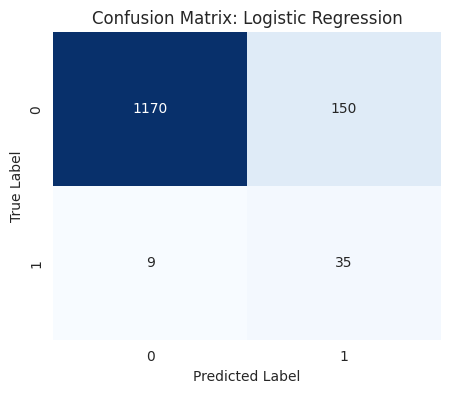


Processing: KNN
Accuracy: 0.8834
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.16      0.64      0.26        44

    accuracy                           0.88      1364
   macro avg       0.58      0.76      0.60      1364
weighted avg       0.96      0.88      0.91      1364



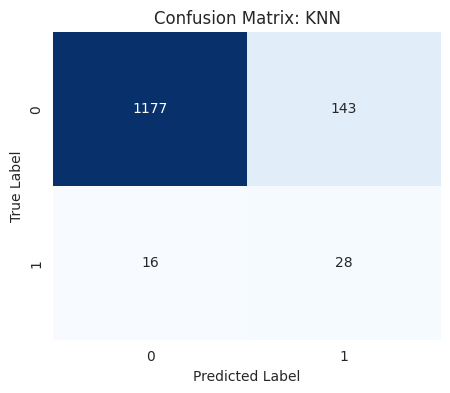


Processing: Random Forest
Accuracy: 0.9597
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.41      0.59      0.49        44

    accuracy                           0.96      1364
   macro avg       0.70      0.78      0.73      1364
weighted avg       0.97      0.96      0.96      1364



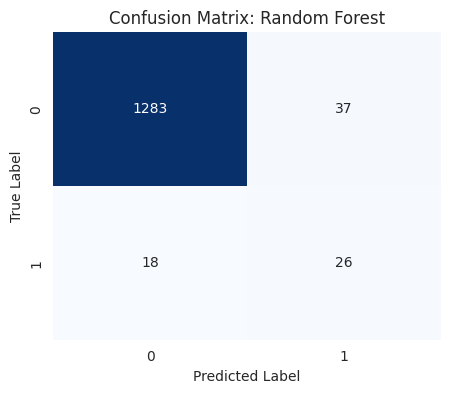


Model Comparison:
Random Forest: 0.9597
Logistic Regression: 0.8834
KNN: 0.8834


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

print("Training models...")

for name, model in models.items():
    print(f"\nProcessing: {name}")

    # Train
    model.fit(X_train_res, y_train_res)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    # Metrics
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Comparison
print("\nModel Comparison:")
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for name, score in sorted_results.items():
    print(f"{name}: {score:.4f}")